In [21]:
import numpy as np
from assortativity import measures as m
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
r1 = np.load("notebook_experiments/data/r1_er100.npy")
la_deg_er = np.load("notebook_experiments/results/r2_la_deg_er.npy")
la_rand_er = np.load("notebook_experiments/results/r2_la_rand_er.npy")

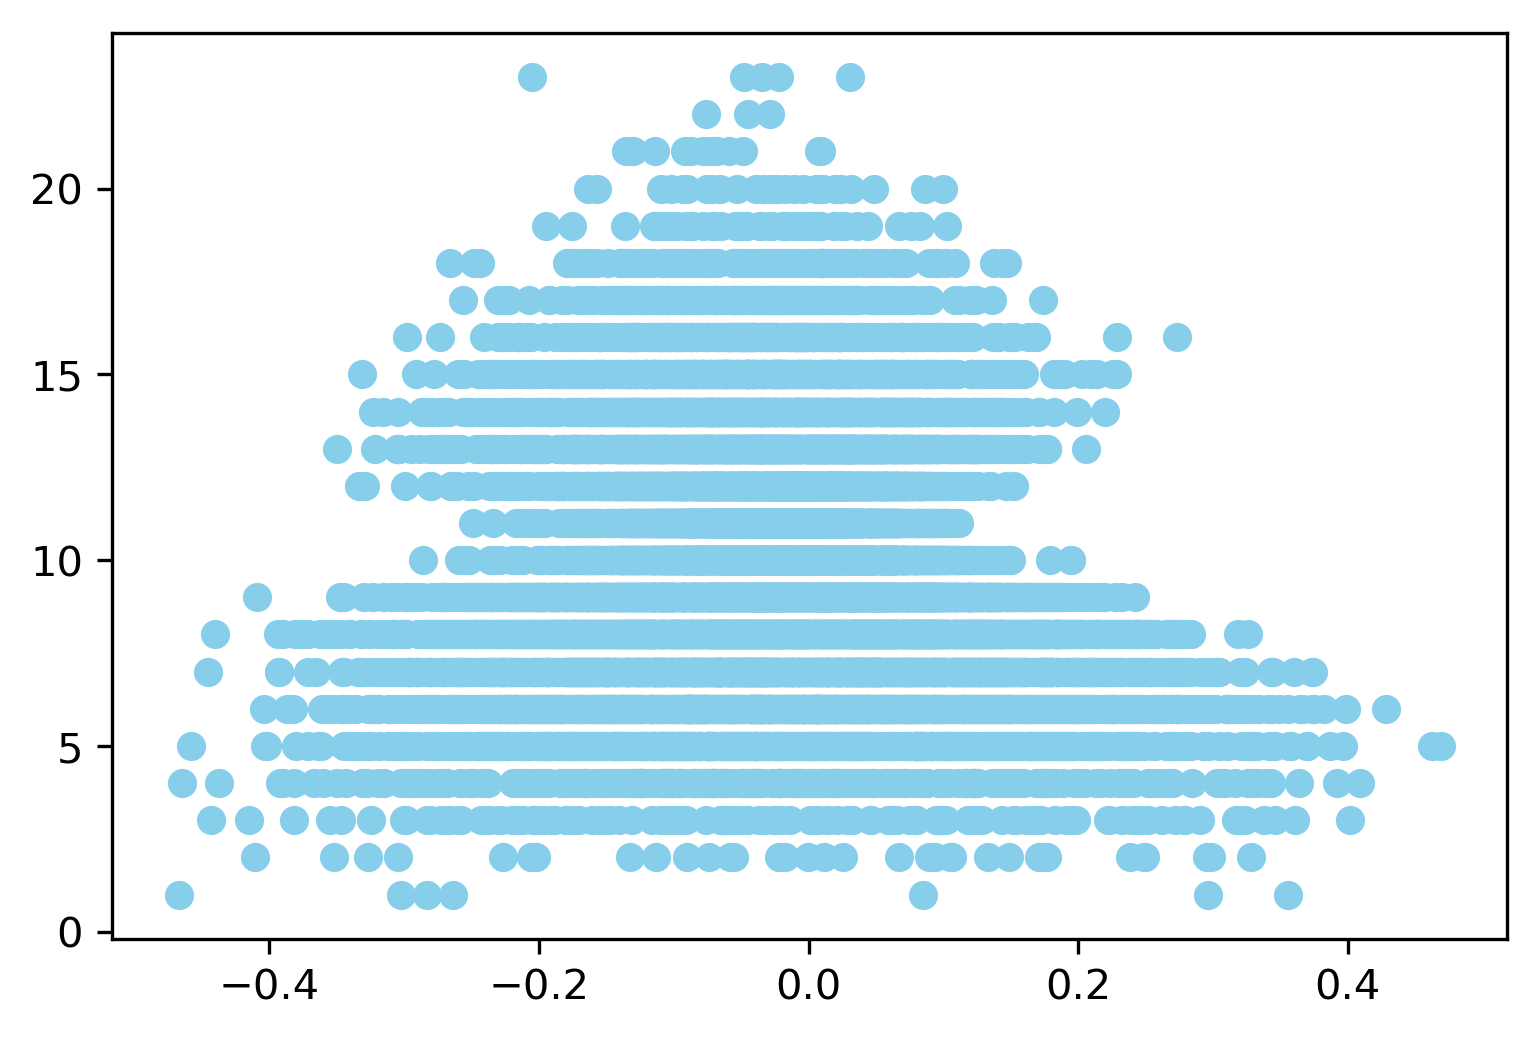

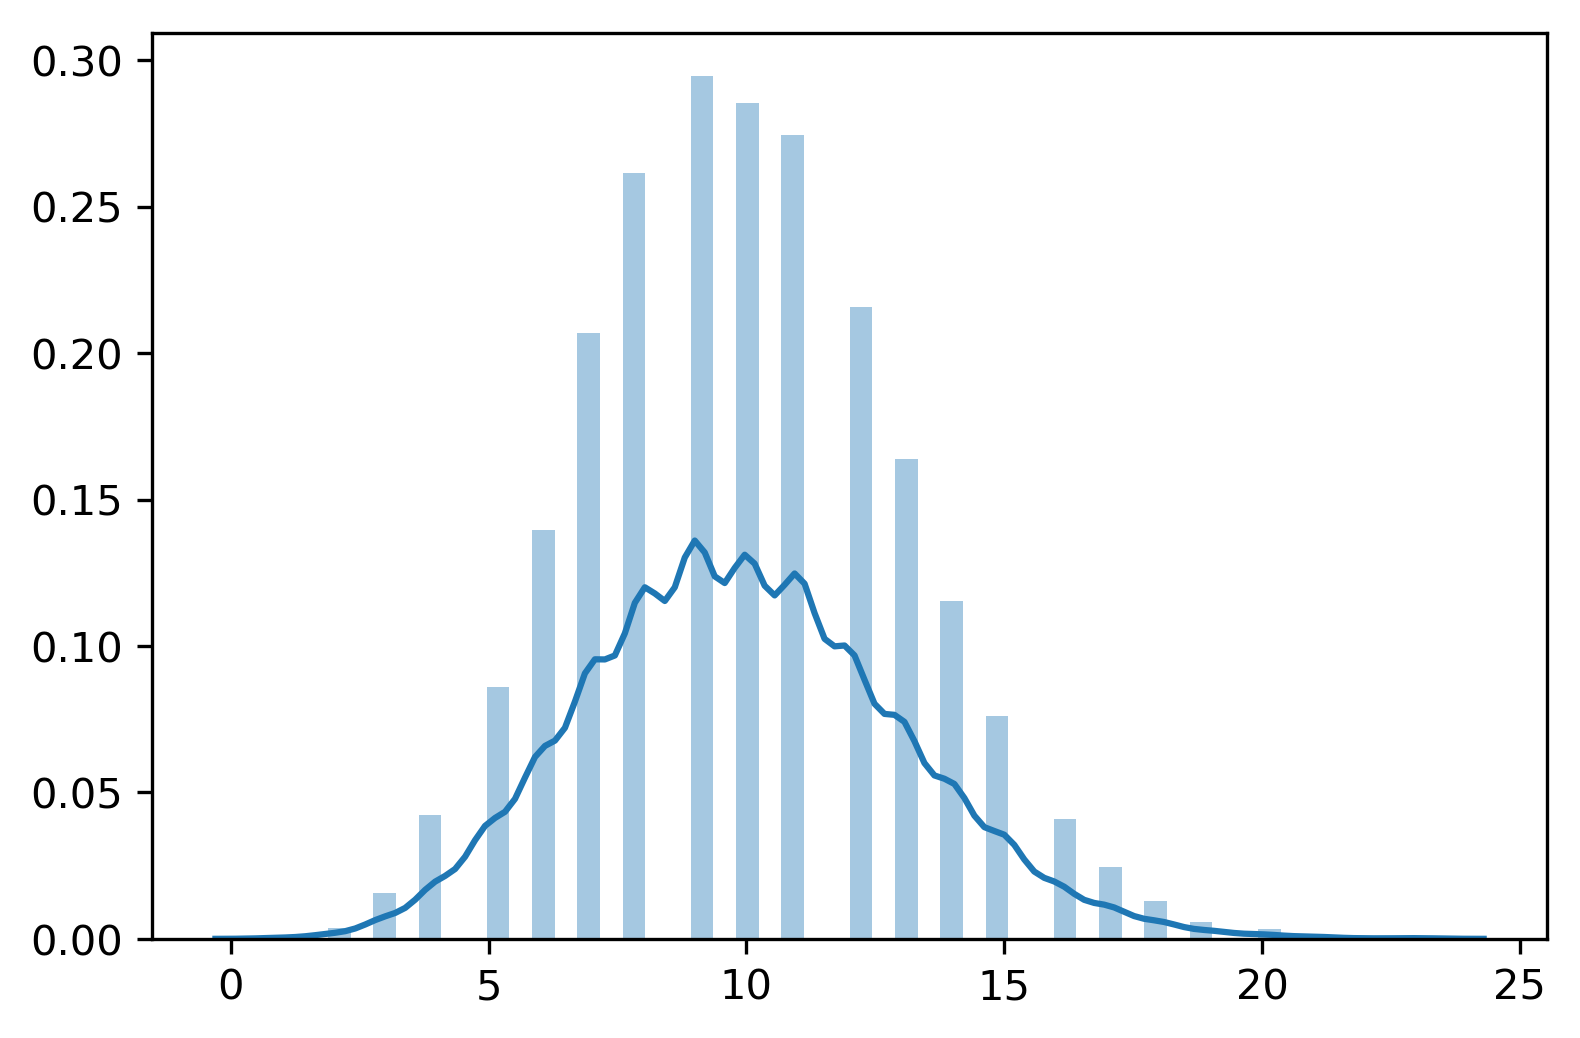

In [12]:
plt.figure(dpi=300)
for i in range(100):
    plt.scatter(la_deg_er[i,:], np.sum(r1[i,:,:], axis=0), c="skyblue")
    
plt.figure(dpi=300)
sns.distplot(np.sum(r1, axis=1).reshape(-1))

In [69]:
alphas

array([1.10002696e-04, 1.10002696e-04, 1.10002696e-04, ...,
       9.86053299e-05, 9.86053299e-05, 9.86053299e-05])

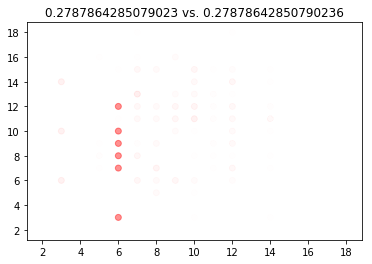

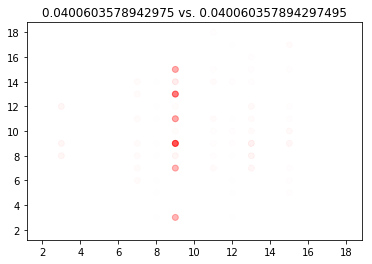

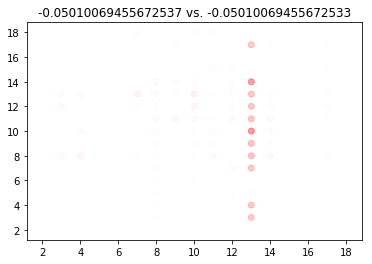

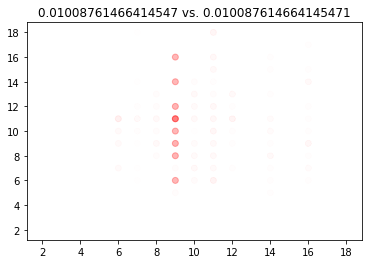

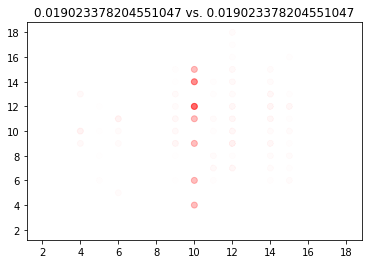

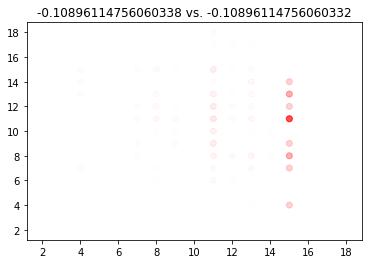

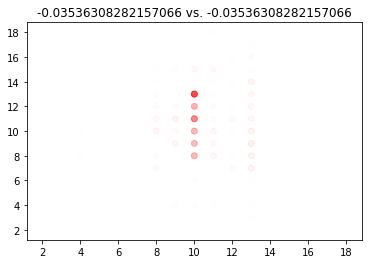

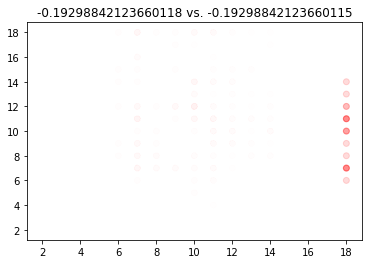

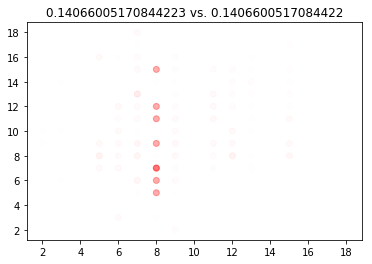

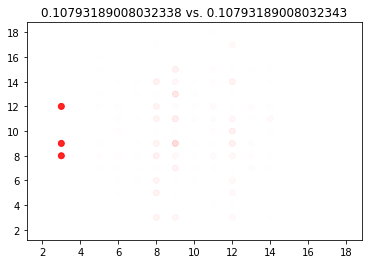

In [72]:
xandy = np.zeros((100),dtype=object)
for i in range(100):
    deg = np.sum(r1[i,:,:], axis=0)
    
    X = r1[i,:,:] * deg[:,np.newaxis]
    Y = r1[i,:,:] * deg[np.newaxis,:]
    
    xandy[i] = (X[X>0].reshape(-1),Y[Y>0].reshape(-1))

la,w = m.localAssort(r1[0,:,:], np.sum(r1[0,:,:], axis=0), thorndike=False)

for i in range(10):

    #Get the density of the points (according to their weights in the correlation)
    alphas = (r1[0,:,:] * (w[i,:]/np.sum(r1[0,:,:], axis=0))[:,np.newaxis])[r1[0,:,:]>0].reshape(-1)
    
    rgba_colors = np.zeros((len(alphas),4))
    # for red the first column needs to be one
    rgba_colors[:,0] = 1.0
    # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas*5
    
    plt.figure()
    plt.scatter(xandy[0][0],xandy[0][1], color=rgba_colors)
    plt.title(str(m.corr(xandy[0][0], xandy[0][1], alphas))+" vs. "+str(la[i]))